In [1]:
# Tugas 4 - Machine Learning
# Nama  : Oktaviana Sadama Nur Azizah
# NIM   : 24060121130060
# Kelas : Big Data A

# KETERANGAN [ ! WAJIB BACA ! ]
# Dalam file .ipynb ini sudah mencakup simulasi ketiga model machine learning,
# yaitu regression, classification, dan clustering

In [3]:
# Install spark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz
!pip install -q findspark

# Keterangan
# Install spark versi terbaru!

In [4]:
# Setting environment variable
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

In [5]:
# Inisialisasi spark
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

Machine Learning 1: Regression

In [6]:
# Upload file
from google.colab import files
!rm contoh.csv
files.upload()

rm: cannot remove 'contoh.csv': No such file or directory


Saving contoh.csv to contoh.csv


{'contoh.csv': b'x,y\r\n4.17022004702574,2.653267393931881\r\n7.203244934421581,8.561284227344442\r\n0.0011437481734488664,-5.668958634489921\r\n3.0233257263183977,1.033986853717894\r\n1.4675589081711304,-3.182192532293017\r\n0.923385947687978,-2.9188124068069516\r\n1.862602113776709,0.3850064046632886\r\n3.4556072704304777,2.6532587014382907\r\n3.9676747423066994,2.743513932251784\r\n5.3881673400335695,4.888705715982303\r\n4.191945144032948,2.636731994315058\r\n6.852195003967595,10.396844608962937\r\n2.0445224973151745,-0.860147250593622\r\n8.781174363909454,11.925353081249554\r\n0.27387593197926163,-4.261332651374011\r\n6.704675101784022,10.509605340046885\r\n4.17304802367127,3.466254999824169\r\n5.586898284457517,6.790999678622453\r\n1.4038693859523377,-1.8920909081394972\r\n1.981014890848788,-1.3902200647959428\r\n8.007445686755366,9.872373175488592\r\n9.682615757193975,14.015888791975073\r\n3.1342417815924284,1.0595893298100787\r\n6.923226156693141,9.43307550456848\r\n8.7638915229

In [7]:
# Load data
dataset = spark.read.csv('contoh.csv', inferSchema=True, header=True, sep=",")
dataset.printSchema()

root
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)



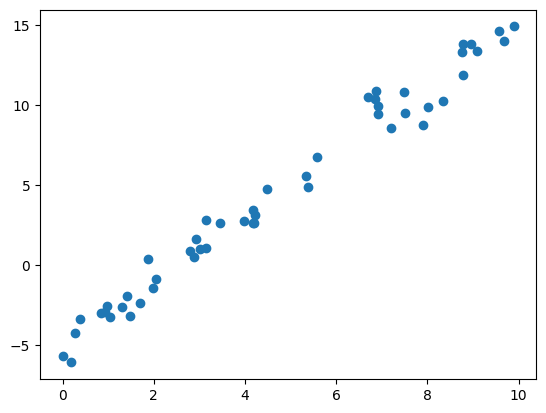

In [9]:
# Melakukan visualisasi data
import matplotlib.pyplot as plt

x = dataset.select("x").rdd.flatMap(lambda x: x).collect()
y = dataset.select("y").rdd.flatMap(lambda x: x).collect()
plt.scatter(x,y)

In [33]:
# Melakukan regression
from pyspark.ml.regression import IsotonicRegression
mesin = IsotonicRegression(labelCol='y')

# Tambahan
# from pyspark.ml.regression import LinearRegression
# mesin = LinearRegression(fitIntercept=True, labelCol='y')

# from pyspark.ml.regression import RandomForestRegressor
# mesin = RandomForestRegressor(labelCol='y')

# from pyspark.ml.regression import GBTRegressor
# mesin = GBTRegressor(labelCol='y')

In [14]:
# Memeriksa data awal
dataset.show(3)

+--------------------+------------------+
|                   x|                 y|
+--------------------+------------------+
|    4.17022004702574| 2.653267393931881|
|   7.203244934421581| 8.561284227344442|
|0.001143748173448...|-5.668958634489921|
+--------------------+------------------+
only showing top 3 rows



In [15]:
# Mempersiapkan data untuk pelatihan
from pyspark.ml.feature import VectorAssembler
vec = VectorAssembler(inputCols=['x'], outputCol='features')
data_train = vec.transform(dataset)

# Memeriksa data pelatihan
data_train.show(3)

+--------------------+------------------+--------------------+
|                   x|                 y|            features|
+--------------------+------------------+--------------------+
|    4.17022004702574| 2.653267393931881|  [4.17022004702574]|
|   7.203244934421581| 8.561284227344442| [7.203244934421581]|
|0.001143748173448...|-5.668958634489921|[0.00114374817344...|
+--------------------+------------------+--------------------+
only showing top 3 rows



In [17]:
# Melakukan pelatihan
model = mesin.fit(data_train)

In [18]:
# Melakukan pengujian dengan membuat 100 data
import numpy as np
xtest = np.linspace(0, 10, 100).tolist()

In [19]:
# Menyesuaikan format untuk input model
from pyspark.sql.types import DoubleType
dftest = spark.createDataFrame(xtest, DoubleType())

In [21]:
# Memerika sample data
dftest.show(3)

+-------------------+
|              value|
+-------------------+
|                0.0|
|0.10101010101010101|
|0.20202020202020202|
+-------------------+
only showing top 3 rows



In [23]:
# Menyesuaikan format untuk input model
testvec = VectorAssembler(inputCols=['value'], outputCol='features')
testvec = testvec.transform(dftest)

# Memeriksa sample data
testvec.show(3)

+-------------------+--------------------+
|              value|            features|
+-------------------+--------------------+
|                0.0|               [0.0]|
|0.10101010101010101|[0.10101010101010...|
|0.20202020202020202|[0.20202020202020...|
+-------------------+--------------------+
only showing top 3 rows



In [25]:
# Melakukan prediksi
predict = model.transform(testvec)
predict.show(3)

+-------------------+--------------------+------------------+
|              value|            features|        prediction|
+-------------------+--------------------+------------------+
|                0.0|               [0.0]|-5.873653446517837|
|0.10101010101010101|[0.10101010101010...|-5.873653446517837|
|0.20202020202020202|[0.20202020202020...|-5.534554611414934|
+-------------------+--------------------+------------------+
only showing top 3 rows



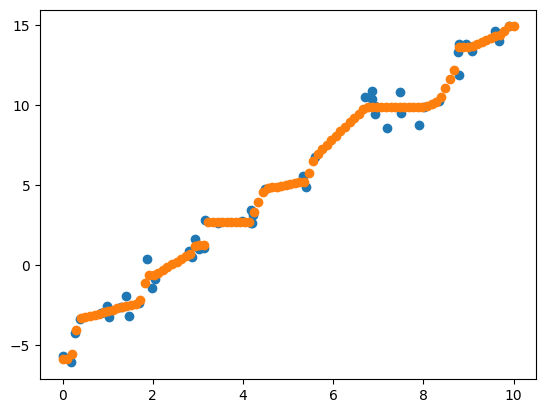

In [26]:
# Memvisualisasikan prediksi
soal = predict.select("value").rdd.flatMap(lambda x: x).collect()
predict = predict.select("prediction").rdd.flatMap(lambda x: x).collect()
plt.scatter(x,y)
plt.scatter(soal,predict)

Machine Learning 2: Classification

In [27]:
# Upload file
from google.colab import files
!rm contoh_clust2.csv
files.upload()

rm: cannot remove 'contoh_clust2.csv': No such file or directory


Saving contoh_clust2.csv to contoh_clust2.csv


{'contoh_clust2.csv': b'x,y,hasil\r\n-3.5429550969664367,-0.00696855436999233,1.0\r\n-2.3316986550613787,0.44003169597474656,1.0\r\n-2.959683409864125,-0.5634355271930849,1.0\r\n2.3273866354072896,2.222651504479419,0.0\r\n-5.064657651260257,-2.1032816302633566,1.0\r\n1.9370736831226498,2.9060880433086544,0.0\r\n0.9798013463846641,2.829970325582672,0.0\r\n-4.57376594874914,-1.7305178525509632,1.0\r\n-3.343835414469978,-0.5009948867115551,1.0\r\n0.19791813006221348,1.843240478987643,0.0\r\n-5.154521554200835,-0.8896451522348774,1.0\r\n-3.9898934900669616,2.07897688119107,1.0\r\n-0.16773652026057917,0.10972356321241876,1.0\r\n-4.3735483085699025,0.5888041446734951,1.0\r\n2.701924989927712,3.965085103160744,0.0\r\n0.5656489397121832,7.400180465447473,0.0\r\n-4.1782389787572605,0.8535056852430456,1.0\r\n-5.475367952146424,1.8240779986274513,1.0\r\n0.784197773642578,6.81739740730271,0.0\r\n0.1293399437626962,3.3883304006793846,0.0\r\n-0.3697299810521737,2.627142811097839,0.0\r\n-0.8502269419

In [28]:
# Load data
dataset = spark.read.csv('contoh_clust2.csv', inferSchema=True, header=True, sep=",")
dataset.printSchema()

root
 |-- x: double (nullable = true)
 |-- y: double (nullable = true)
 |-- hasil: double (nullable = true)



In [29]:
# Melihat sample data
dataset.show(3)

+-------------------+--------------------+-----+
|                  x|                   y|hasil|
+-------------------+--------------------+-----+
|-3.5429550969664367|-0.00696855436999233|  1.0|
|-2.3316986550613787| 0.44003169597474656|  1.0|
| -2.959683409864125| -0.5634355271930849|  1.0|
+-------------------+--------------------+-----+
only showing top 3 rows



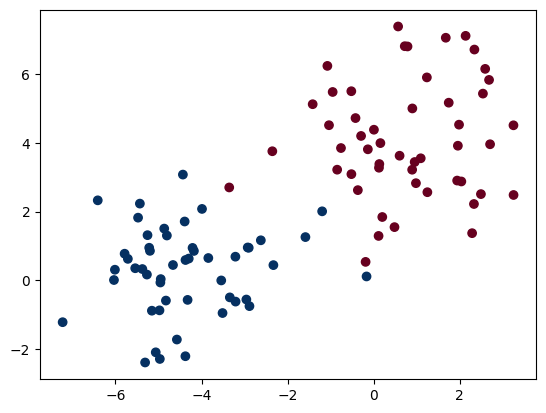

In [30]:
# Melakukan visualisasi data pelatihan
import matplotlib.pyplot as plt

x = dataset.select("x").rdd.flatMap(lambda x: x).collect()
y = dataset.select("y").rdd.flatMap(lambda x: x).collect()
hasil = dataset.select("hasil").rdd.flatMap(lambda x: x).collect()
plt.scatter(x, y, c=hasil, cmap='RdBu')

In [34]:
# Melakukan classification
from pyspark.ml.classification import LogisticRegression
mesin = LogisticRegression(labelCol='hasil', elasticNetParam=0.7)

# Tambahan
# from pyspark.ml.classification import RandomForestClassifier
# mesin = RandomForestClassifier(labelCol='hasil')

# from pyspark.ml.classification import GBTClassifier
# mesin = GBTClassifier(labelCol='hasil')

In [36]:
# Memeriksa sample data
dataset.show(3)

+-------------------+--------------------+-----+
|                  x|                   y|hasil|
+-------------------+--------------------+-----+
|-3.5429550969664367|-0.00696855436999233|  1.0|
|-2.3316986550613787| 0.44003169597474656|  1.0|
| -2.959683409864125| -0.5634355271930849|  1.0|
+-------------------+--------------------+-----+
only showing top 3 rows



In [37]:
# Mempersiapkan data untuk pelatihan
from pyspark.ml.feature import VectorAssembler
vec = VectorAssembler(inputCols=['x','y'], outputCol='features')
data_train = vec.transform(dataset)

# Memeriksa data pelatihan
data_train.show(3)

+-------------------+--------------------+-----+--------------------+
|                  x|                   y|hasil|            features|
+-------------------+--------------------+-----+--------------------+
|-3.5429550969664367|-0.00696855436999233|  1.0|[-3.5429550969664...|
|-2.3316986550613787| 0.44003169597474656|  1.0|[-2.3316986550613...|
| -2.959683409864125| -0.5634355271930849|  1.0|[-2.9596834098641...|
+-------------------+--------------------+-----+--------------------+
only showing top 3 rows



In [38]:
# Melakukan pelatihan
model = mesin.fit(data_train)

In [39]:
# Melakukan pengujian dengan membuat 2000 sample data
import numpy as np
rng = np.random.RandomState(0)
xuji = [-8, -4] + [12, 12] * rng.rand(2000, 2)
arr = xuji.tolist()

In [40]:
xuji

array([[-1.41423795,  4.5822724 ],
       [-0.76683949,  2.5385982 ],
       [-2.91614241,  3.75072936],
       ...,
       [-6.56115313,  0.19567241],
       [-2.78151645,  5.96003536],
       [ 3.19367419, -0.29993879]])

In [44]:
# Menyesuaikan format untuk input model
from pyspark.sql.types import DoubleType
dftest = spark.createDataFrame(arr)

# Memerika sample data
dftest.show(3)

+------------------+-----------------+
|                _1|               _2|
+------------------+-----------------+
|-1.414237952872103|4.582272396469033|
|-0.766839487140274|2.538598195962763|
|-2.916142407933144|3.750729356799873|
+------------------+-----------------+
only showing top 3 rows



In [45]:
# Menyesuaikan format untuk input model
testvec = VectorAssembler(inputCols=['_1','_2'], outputCol='features')
testvec = testvec.transform(dftest)

# Memeriksa sample data
testvec.show(3)

+------------------+-----------------+--------------------+
|                _1|               _2|            features|
+------------------+-----------------+--------------------+
|-1.414237952872103|4.582272396469033|[-1.4142379528721...|
|-0.766839487140274|2.538598195962763|[-0.7668394871402...|
|-2.916142407933144|3.750729356799873|[-2.9161424079331...|
+------------------+-----------------+--------------------+
only showing top 3 rows



In [46]:
# Melakukan prediksi
predict = model.transform(testvec)
predict.show(3)

+------------------+-----------------+--------------------+--------------------+--------------------+----------+
|                _1|               _2|            features|       rawPrediction|         probability|prediction|
+------------------+-----------------+--------------------+--------------------+--------------------+----------+
|-1.414237952872103|4.582272396469033|[-1.4142379528721...|[7.68218735161275...|[0.99953924688969...|       0.0|
|-0.766839487140274|2.538598195962763|[-0.7668394871402...|[3.64219587804596...|[0.97447389006386...|       0.0|
|-2.916142407933144|3.750729356799873|[-2.9161424079331...|[2.75819019739155...|[0.94037423827068...|       0.0|
+------------------+-----------------+--------------------+--------------------+--------------------+----------+
only showing top 3 rows



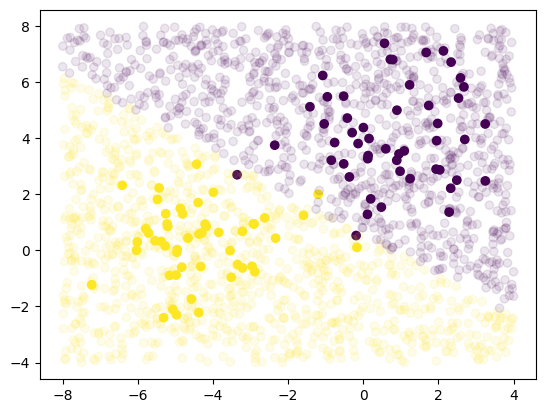

In [47]:
# Memvisualisasikan prediksi
soalX = predict.select("_1").rdd.flatMap(lambda x: x).collect()
soalY = predict.select("_2").rdd.flatMap(lambda x: x).collect()
pred  = predict.select("prediction").rdd.flatMap(lambda x: x).collect()
plt.scatter(x, y, c=hasil)
plt.scatter(soalX, soalY, c=pred, alpha=0.1)

Machine Learning 3: Clustering

In [48]:
# Upload file
from google.colab import files
!rm iris_dataset.csv
files.upload()

rm: cannot remove 'iris_dataset.csv': No such file or directory


Saving iris_dataset.csv to iris_dataset.csv


{'iris_dataset.csv': b'sepal_length,sepal_width,petal_length,petal_width,species\n5.1,3.5,1.4,0.2,setosa\n4.9,3,1.4,0.2,setosa\n4.7,3.2,1.3,0.2,setosa\n4.6,3.1,1.5,0.2,setosa\n5,3.6,1.4,0.2,setosa\n5.4,3.9,1.7,0.4,setosa\n4.6,3.4,1.4,0.3,setosa\n5,3.4,1.5,0.2,setosa\n4.4,2.9,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5.4,3.7,1.5,0.2,setosa\n4.8,3.4,1.6,0.2,setosa\n4.8,3,1.4,0.1,setosa\n4.3,3,1.1,0.1,setosa\n5.8,4,1.2,0.2,setosa\n5.7,4.4,1.5,0.4,setosa\n5.4,3.9,1.3,0.4,setosa\n5.1,3.5,1.4,0.3,setosa\n5.7,3.8,1.7,0.3,setosa\n5.1,3.8,1.5,0.3,setosa\n5.4,3.4,1.7,0.2,setosa\n5.1,3.7,1.5,0.4,setosa\n4.6,3.6,1,0.2,setosa\n5.1,3.3,1.7,0.5,setosa\n4.8,3.4,1.9,0.2,setosa\n5,3,1.6,0.2,setosa\n5,3.4,1.6,0.4,setosa\n5.2,3.5,1.5,0.2,setosa\n5.2,3.4,1.4,0.2,setosa\n4.7,3.2,1.6,0.2,setosa\n4.8,3.1,1.6,0.2,setosa\n5.4,3.4,1.5,0.4,setosa\n5.2,4.1,1.5,0.1,setosa\n5.5,4.2,1.4,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n5,3.2,1.2,0.2,setosa\n5.5,3.5,1.3,0.2,setosa\n4.9,3.1,1.5,0.1,setosa\n4.4,3,1.3,0.2,setosa\n5.1,3.

In [72]:
# Import library
import pyspark
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql.functions import rand, randn
from pyspark.ml.clustering import KMeans

In [73]:
# Load data
dataset = spark.read.csv('iris_dataset.csv', inferSchema=True, header=True, sep=",")
dataset.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



In [74]:
# Memeriksa dimensi data
print((dataset.count(), len(dataset.columns)))

(150, 5)


In [75]:
# Memeriksa nama kolom
dataset.columns

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [76]:
# Menampilkan contoh data
dataset.orderBy(rand()).show(10,False)

+------------+-----------+------------+-----------+----------+
|sepal_length|sepal_width|petal_length|petal_width|species   |
+------------+-----------+------------+-----------+----------+
|6.9         |3.1        |5.4         |2.1        |virginica |
|6.5         |3.2        |5.1         |2.0        |virginica |
|6.2         |2.8        |4.8         |1.8        |virginica |
|5.5         |4.2        |1.4         |0.2        |setosa    |
|4.5         |2.3        |1.3         |0.3        |setosa    |
|6.6         |2.9        |4.6         |1.3        |versicolor|
|4.4         |2.9        |1.4         |0.2        |setosa    |
|7.9         |3.8        |6.4         |2.0        |virginica |
|5.0         |3.5        |1.6         |0.6        |setosa    |
|4.3         |3.0        |1.1         |0.1        |setosa    |
+------------+-----------+------------+-----------+----------+
only showing top 10 rows



In [77]:
# Menampilkan jenis spesies
dataset.select('species').distinct().count()

3

In [78]:
# Menghitung jumlah data dari masing-masing spesies
dataset.groupBy('species').count().orderBy('count', ascending=False).show(10,False)

+----------+-----+
|species   |count|
+----------+-----+
|virginica |50   |
|versicolor|50   |
|setosa    |50   |
+----------+-----+



In [79]:
# Menyeleksi kolom
input_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [80]:
# Mengubah semua fitur (kolom) menjadi vektor menggunakan vectorAssembler
from pyspark.ml.feature import VectorAssembler

vec_assembler = VectorAssembler(inputCols=input_cols, outputCol="features")
final_data = vec_assembler.transform(dataset)

In [85]:
# Melakukan clustering
errors = []

for k in range(2,10):
    kmeans = KMeans(featuresCol="features", k=k)
    model  = kmeans.fit(final_data)
    jarak  = model.summary.trainingCost
    errors.append(jarak)
    print("K={}".format(k))
    print("Jumlah jarak kuadrat = " + str(jarak))
    print('--'*30)

K=2
Jumlah jarak kuadrat = 152.36870647733915
------------------------------------------------------------
K=3
Jumlah jarak kuadrat = 78.94506582597728
------------------------------------------------------------
K=4
Jumlah jarak kuadrat = 57.435310714285734
------------------------------------------------------------
K=5
Jumlah jarak kuadrat = 46.535582051282034
------------------------------------------------------------
K=6
Jumlah jarak kuadrat = 44.84458998778997
------------------------------------------------------------
K=7
Jumlah jarak kuadrat = 37.66878803904381
------------------------------------------------------------
K=8
Jumlah jarak kuadrat = 35.92223333333332
------------------------------------------------------------
K=9
Jumlah jarak kuadrat = 35.18886428571429
------------------------------------------------------------


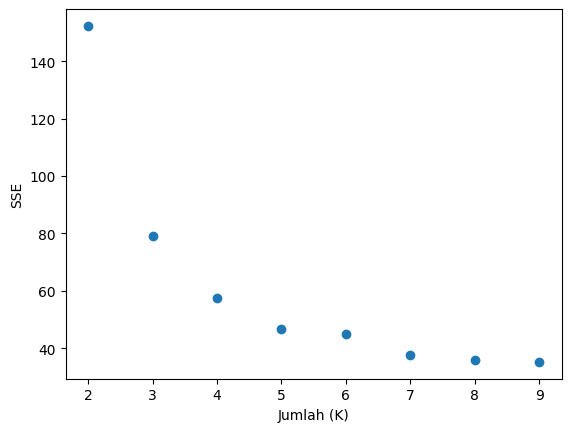

In [87]:
# Memeriksa masing-masing cluster
cluster_number = range(2,10)
plt.scatter(cluster_number, errors)
plt.xlabel("Jumlah (K)")
plt.ylabel("SSE")
plt.show()

In [89]:
# Menggunakan k=3 untuk KMeans Clustering
kmeans = KMeans(featuresCol="features", k=3)

In [90]:
# Melatih model
model = kmeans.fit(final_data)

In [95]:
# Memeriksa pengelompokkan
model.transform(final_data).groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|   50|
|         2|   61|
|         0|   39|
+----------+-----+



In [96]:
# Melakukan prediksi
predict = model.transform(final_data)
predict.columns

['sepal_length',
 'sepal_width',
 'petal_length',
 'petal_width',
 'species',
 'features',
 'prediction']

In [97]:
# Memeriksa hasil prediksi
predict.groupBy('species', 'prediction').count().show()

+----------+----------+-----+
|   species|prediction|count|
+----------+----------+-----+
| virginica|         2|   14|
| virginica|         0|   36|
|versicolor|         0|    3|
|    setosa|         1|   50|
|versicolor|         2|   47|
+----------+----------+-----+



In [98]:
# Memeriksa data hasil prediksi
pandas_df = predict.toPandas()
pandas_df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species,features,prediction
0,5.1,3.5,1.4,0.2,setosa,"[5.1, 3.5, 1.4, 0.2]",1
1,4.9,3.0,1.4,0.2,setosa,"[4.9, 3.0, 1.4, 0.2]",1
2,4.7,3.2,1.3,0.2,setosa,"[4.7, 3.2, 1.3, 0.2]",1
3,4.6,3.1,1.5,0.2,setosa,"[4.6, 3.1, 1.5, 0.2]",1
4,5.0,3.6,1.4,0.2,setosa,"[5.0, 3.6, 1.4, 0.2]",1


In [100]:
# Melakukan mapping untuk mengubah teks ke angka
mapping = {'versicolor':2, 'virginica':0, 'setosa':1}
hasil   = [
    mapping[x] for x in pandas_df.species
]

Text(109.44999999999997, 0.5, 'nilai prediksi')

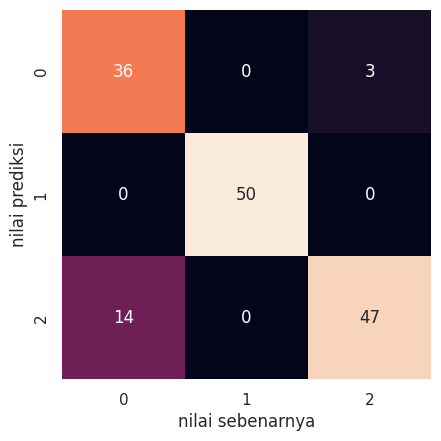

In [103]:
# Memeriksa tingkat kesalahan
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

mat = confusion_matrix(hasil, pandas_df.prediction)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('nilai sebenarnya')
plt.ylabel('nilai prediksi')

In [104]:
# Memeriksa akurasi
from sklearn.metrics import accuracy_score
accuracy_score(hasil, pandas_df.prediction)

0.8866666666666667